# Example to load and plot spectrum (json)

In [16]:
import s3fs
import json
import pandas as pd
# Setup the S3 filesystem
fs = s3fs.S3FileSystem(anon=True,endpoint_url="https://minio.dive.edito.eu")
# List contents of the bucket
bucket_name = 'project-meom-ige/OMIP/'

s3_path = f"{bucket_name}"
print(fs.ls(bucket_name))


['project-meom-ige/OMIP/OMIP_eorca12-era5v1_Region_5.json']


In [21]:
files = [f for f in fs.ls(s3_folder) if f.endswith(".json")]

# Read them
data_list = []
for file in files:
    with fs.open(file, 'r') as f:   # open in text mode
        data = json.load(f)        # parse JSON
        data_list.append(data)


In [27]:
spectra=data["Spectra"]
freq=data["Frequency"]

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/widetrax/Spectra.py:234: RuntimeWarning: divide by zero encountered in divide
  ax2 = ax.secondary_xaxis("bottom", functions=(lambda x: 1 / x, lambda x: 1 / x))


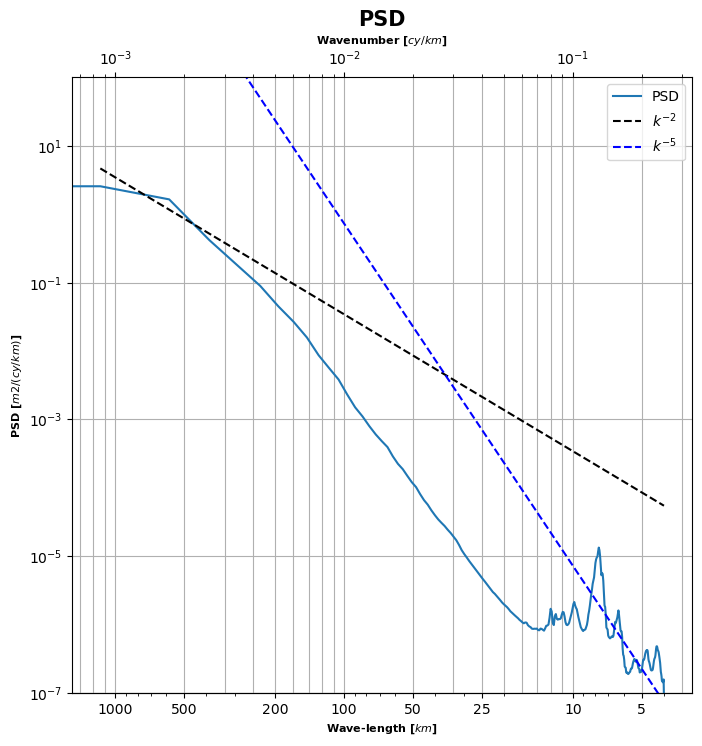

In [47]:
from widetrax import Spectra as sp
import matplotlib.pyplot as plt
import numpy as np
fig, ax_ = plt.subplots(1, 1, figsize=(8, 8))
sp.plot_psd(ax_, np.array(freq), np.array(spectra), unit = "m2",psd_labels="PSD",title="PSD",savefig=True,plot_transparent=False)

# Add to the figure 
# 1) Effective resolution model (or the resolution)
# 2) Compared with AVISO (not good idea because here the analysis is one year)

# Ideally, it should be a configuration option, where it's defined the region, model, and seasion.